<font size='6'><b>Case Study on Measures of Central Tendency and Dispersion</b></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
stud_perf=pd.read_csv('StudentsPerformance.csv')
stud_perf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [3]:
stud_perf.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
stud_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 1. Find out how many males and females participated in the test

In [5]:
gender=stud_perf['gender'].value_counts()
print('There are ',gender["male"],' males and',gender["female"],'females, participated in the test')

There are  482  males and 518 females, participated in the test


## 2. What do you think about the students parental level of education?

In [6]:
stud_perf['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

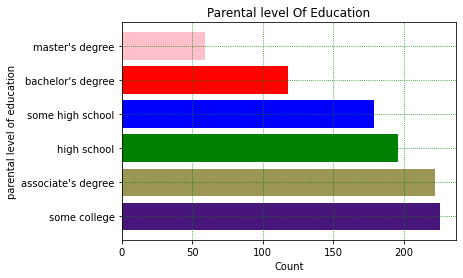

Above 62% have college education and remaining upto school level education.
Among this only 6% of the parents have a masters degree.


In [7]:
stud= stud_perf['parental level of education'].value_counts().to_frame().reset_index()
x = stud['index']
y = stud['parental level of education']
plt.barh(stud['index'],stud['parental level of education'],color = ['#48167a','#9c9656','green','blue','red','pink'])
plt.grid(linestyle='dotted',color='green')
plt.title('Parental level Of Education')
plt.xlabel('Count')
plt.ylabel('parental level of education') 
plt.show()
print('Above 62% have college education and remaining upto school level education.\nAmong this only 6% of the parents have a masters degree.')

## 3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course


In [8]:
gender_data=stud_perf.groupby('gender')['math score','reading score','writing score'].mean()
test_prep_score=stud_perf.groupby('test preparation course')['math score','reading score','writing score'].mean()

In [9]:
gender_data

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [10]:
test_prep_score

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


* Based on gender wise females leading in reading and writing scores yet males scored more on math.
* Based on test preparation those who completed the preparation scored more than tose who partially done/not.

## 4. What do you think about the scoring variation for math, reading and writing based on
● Gender
● Test preparation course

In [11]:
math1=stud_perf.groupby('gender')['math score'].describe()
math1

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.376448,16.029928,0.0,54.0,65.0,74.0,100.0
male,482.0,68.821577,14.556411,27.0,59.0,69.0,79.0,100.0


In math,Maximum mark for math is 100. 50 % of females and males scored above 60.Minimum mark scored by females is 0 but males is 27.

In [12]:
read1=stud_perf.groupby('gender')['reading score'].describe()
read1

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.590734,14.411018,17.0,63.25,73.0,83.0,100.0
male,482.0,65.545643,14.149594,23.0,56.00,66.0,76.0,100.0


In reading, both case maximum is 100.75% above of them in each case scored 50 and more. Minimum scored by female is 17 and male is 23. 

In [13]:
write1=stud_perf.groupby('gender')['writing score'].describe()
write1

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.0,100.0
male,482.0,63.446058,14.227225,15.0,53.0,64.0,74.0,100.0


In the case of writing score for females, 25% of the females have a score of 82 or above while for males, it is 74 marks or above. The maximum mark for maths is 100 for both males and females, the minimum mark scored by the females is 10 and that by males is 15.


In [14]:
math2=stud_perf.groupby('test preparation course')['math score'].describe()
math2

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,69.96648,14.521847,23.0,61.0,70.0,79.0,100.0
none,642.0,63.78972,15.705689,0.0,54.0,64.0,74.0,100.0


The course test preparation completed by 358 and remaining notin math,.maximum score in both case is 100. Minimum score by course completed is 23 and other is zero.755 scored 50 above in the cases.

In [15]:
read2=stud_perf.groupby('test preparation course')['reading score'].describe()
read2

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.175978,13.537572,37.0,66.0,75.0,84.0,100.0
none,642.0,66.417445,14.608896,17.0,57.0,67.0,76.0,100.0


Reading:25% of course completed scored 84 and above whereas others 75 and above.Minimum scored by course completed is 37 and other 17.  maximum in both case is 100.

In [16]:
write2=stud_perf.groupby('test preparation course')['writing score'].describe()
write2

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.684358,13.236412,36.0,67.0,76.0,83.75,100.0
none,642.0,64.457944,15.041667,10.0,54.0,65.0,74.00,100.0


In writing, minimum scored by test preparation completed scored 36 and other 10. mximum in both case is 100.25% who completed the preparation got 80 and above. 

## 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [17]:
stud_perf.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In math, top 25% students  scored  77 or above.

In [18]:
top25=stud_perf[(stud_perf['math score']>=77.000000)]
gen_top25=top25["gender"].value_counts()
print('In math scoring', len(top25), 'students belong to top 25(77 or above).\nGender wise count in top math scoring\nMale =',gen_top25['male'],'\nFemale=',gen_top25['female'])

In math scoring 255 students belong to top 25(77 or above).
Gender wise count in top math scoring
Male = 151 
Female= 104


 Thank You